# Почему <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html">scipy.optimize.minimize</a> находит разные минимумы в зависимости от разной точки $x_0$ для $f(x) = sin\frac{x}{5}e^{\frac{x}{10}} + 5e^{-\frac{x}{2}}$?

## 1. Этих минимумов бесконечно много

А цель методов оптимизации поиск по возможности голобального, а не локального минимума

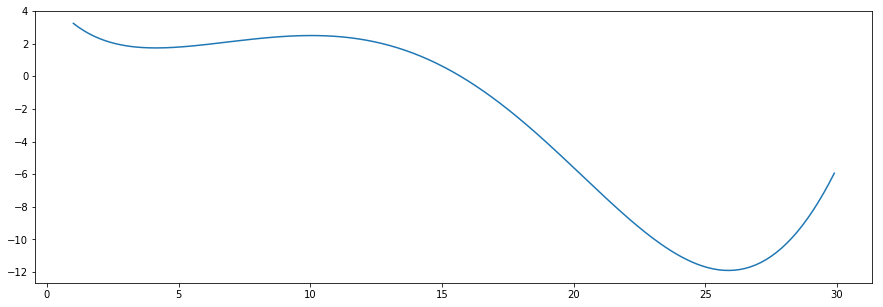

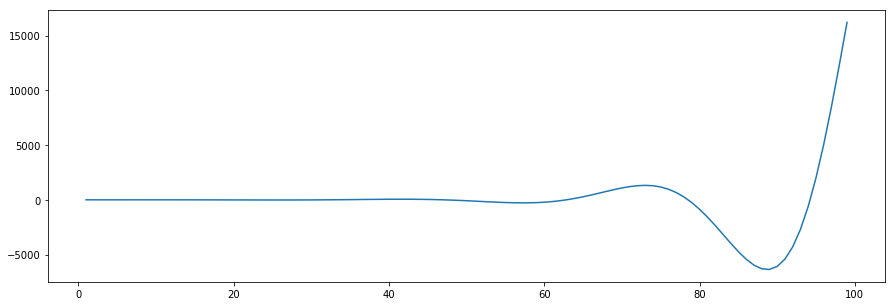

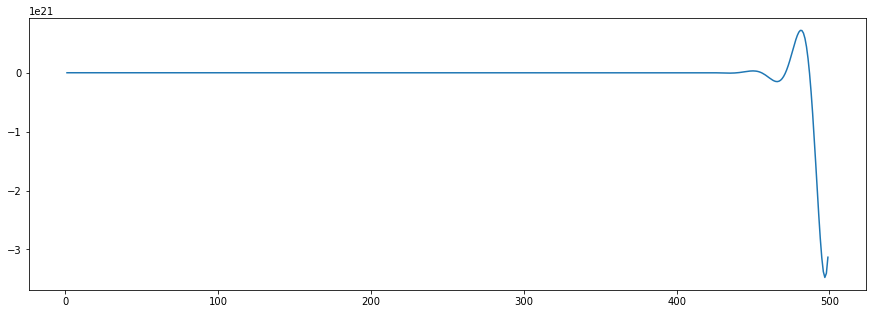

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
def f(x):
    return np.sin(x / 5.) * np.exp(x / 10.) + 5. * np.exp(-x / 2.)

x = np.arange(1, 30, 0.1)
plt.subplots(figsize=(15,5))
plt.plot(x, f(x))
plt.show()

x = np.arange(1, 100)
plt.subplots(figsize=(15,5))
plt.plot(x, f(x))
plt.show()

x = np.arange(1, 500)
plt.subplots(figsize=(15,5))
plt.plot(x, f(x))
plt.show()

При этом каждый минимум отделён от предыдущих максимумом.

По сути это "потенциальный барьер". И преодолеет ли его процесс оптимизации зависит от того насколько вы "разгонались" при спуске (для градиентных методов это зависит от величины шага и от того где вы делаете очередной шаг, а значит какова величина градиента в этой точке).

## 2. Важно откуда вы начинаете спуск

In [14]:
from scipy.optimize import minimize

for x0 in np.arange(10, 16):
    print minimize(f, x0).x

[ 4.13630023]
[ 25.88019285]
[ 25.88019172]
[ 88.71203605]
[ 25.88019315]
[ 24.67766109]


In [15]:
for x0 in np.arange(10, 16, 0.1):
    print x0, minimize(f, x0).x, minimize(f, x0).nit

10.0 [ 4.13630023] 3
10.1 [ 57.29610951] 1
10.2 [ 25.88018421] 2
10.3 [ 25.88018594] 3
10.4 [ 25.88019268] 2
10.5 [ 25.88019282] 5
10.6 [ 25.88019298] 2
10.7 [ 25.88019332] 2
10.8 [ 25.88020177] 2
10.9 [ 88.71203603] 2
11.0 [ 25.88019275] 2
11.1 [ 57.2961094] 2
11.2 [ 57.29610949] 4
11.3 [ 25.88019301] 2
11.4 [ 25.88019245] 2
11.5 [ 25.88019417] 3
11.6 [ 25.88019809] 3
11.7 [ 25.88019294] 4
11.8 [ 25.88019319] 4
11.9 [ 25.88019276] 4
12.0 [ 25.88019189] 4
12.1 [ 25.88019342] 5
12.2 [ 25.88018795] 5
12.3 [ 25.88019277] 5
12.4 [ 25.88019301] 2
12.5 [ 25.88019276] 5
12.6 [ 25.88019355] 4
12.7 [ 25.88019308] 4
12.8 [ 25.88018503] 3
12.9 [ 214.375742] 3
13.0 [ 88.712036] 3
13.1 [ 88.71203601] 1
13.2 [ 371.45537479] 1
13.3 [ 182.95981561] 1
13.4 [ 182.95981561] 1
13.5 [ 25.88019291] 5
13.6 [ 25.88019296] 6
13.7 [ 25.88019285] 4
13.8 [ 25.88017962] 3
13.9 [ 25.88019301] 2
14.0 [ 25.88019305] 2
14.1 [ 25.88019266] 2
14.2 [ 25.88019159] 2
14.3 [ 25.88018406] 2
14.4 [ 25.88019289] 3
14.5 [ 25.88

C:\Users\Aleksey\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


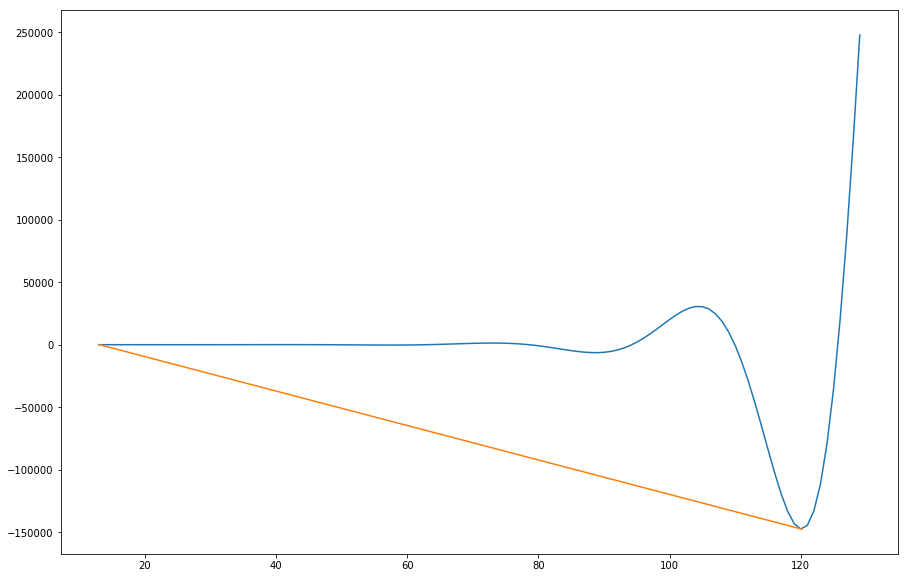

In [16]:
x = np.arange(13, 130)
x0 = 13.1
plt.subplots(figsize=(15,10))
plt.plot(x, f(x))
plt.plot([x0, minimize(f, x0).x], [f(x0), f(minimize(f, x0).x)])
plt.show()

### Визуализация методов оптимизации

http://www.benfrederickson.com/numerical-optimization/

In [17]:
for x0 in np.arange(10, 16, 0.1):
    print x0, minimize(f, x0, method='BFGS').x, minimize(f, x0, method='BFGS').nit

10.0 [ 4.13630023] 3
10.1 [ 57.29610951] 1
10.2 [ 25.88018421] 2
10.3 [ 25.88018594] 3
10.4 [ 25.88019268] 2
10.5 [ 25.88019282] 5
10.6 [ 25.88019298] 2
10.7 [ 25.88019332] 2
10.8 [ 25.88020177] 2
10.9 [ 88.71203603] 2
11.0 [ 25.88019275] 2
11.1 [ 57.2961094] 2
11.2 [ 57.29610949] 4
11.3 [ 25.88019301] 2
11.4 [ 25.88019245] 2
11.5 [ 25.88019417] 3
11.6 [ 25.88019809] 3
11.7 [ 25.88019294] 4
11.8 [ 25.88019319] 4
11.9 [ 25.88019276] 4
12.0 [ 25.88019189] 4
12.1 [ 25.88019342] 5
12.2 [ 25.88018795] 5
12.3 [ 25.88019277] 5
12.4 [ 25.88019301] 2
12.5 [ 25.88019276] 5
12.6 [ 25.88019355] 4
12.7 [ 25.88019308] 4
12.8 [ 25.88018503] 3
12.9 [ 214.375742] 3
13.0 [ 88.712036] 3
13.1 [ 88.71203601] 1
13.2 [ 371.45537479] 1
13.3 [ 182.95981561] 1
13.4 [ 182.95981561] 1
13.5 [ 25.88019291] 5
13.6 [ 25.88019296] 6
13.7 [ 25.88019285] 4
13.8 [ 25.88017962] 3
13.9 [ 25.88019301] 2
14.0 [ 25.88019305] 2
14.1 [ 25.88019266] 2
14.2 [ 25.88019159] 2
14.3 [ 25.88018406] 2
14.4 [ 25.88019289] 3
14.5 [ 25.88

C:\Users\Aleksey\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


In [18]:
x0 = 15.5
x_list = []
for maxiter in range(6):
    print x0, minimize(f, x0, method='BFGS', options={'maxiter':maxiter}).x, minimize(f, x0, method='BFGS', options={'maxiter':maxiter}).nit
    x_list.append(minimize(f, x0, method='BFGS', options={'maxiter':maxiter}).x)

15.5 [ 15.5] 0
15.5 [ 24.22999258] 1
15.5 [ 88.71138619] 2
15.5 [ 151.54388902] 3
15.5 [ 151.54388902] 3
15.5 [ 151.54388902] 3


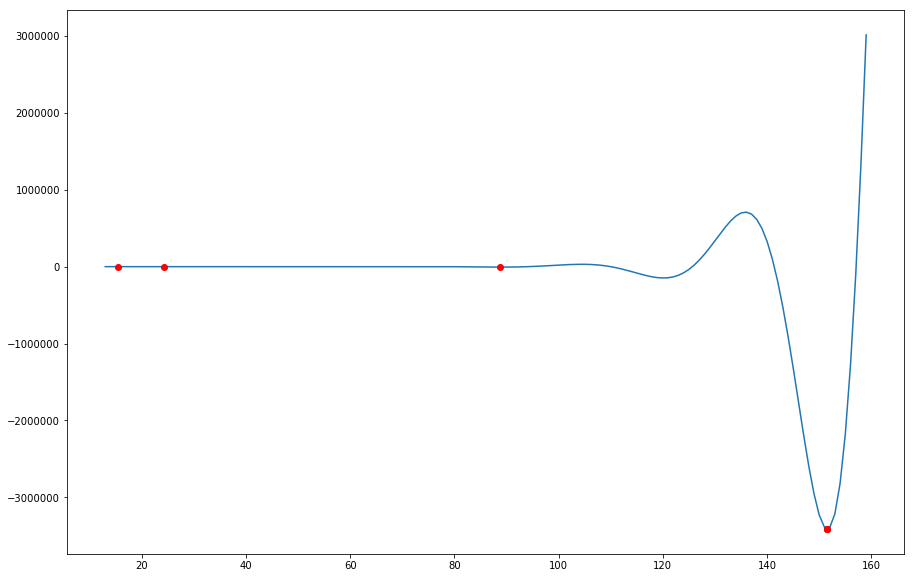

In [7]:
x = np.arange(13, 160)
x0 = 13.1
plt.subplots(figsize=(15,10))
plt.plot(x, f(x))
plt.plot(x_list, f(np.array(x_list)), 'ro')
plt.show()

## Проблема с int при построении графика

In [19]:
x = np.arange(1, 30)
def g(x):
    return int(f(x))

plt.plot(x, g(x))

TypeError: only length-1 arrays can be converted to Python scalars

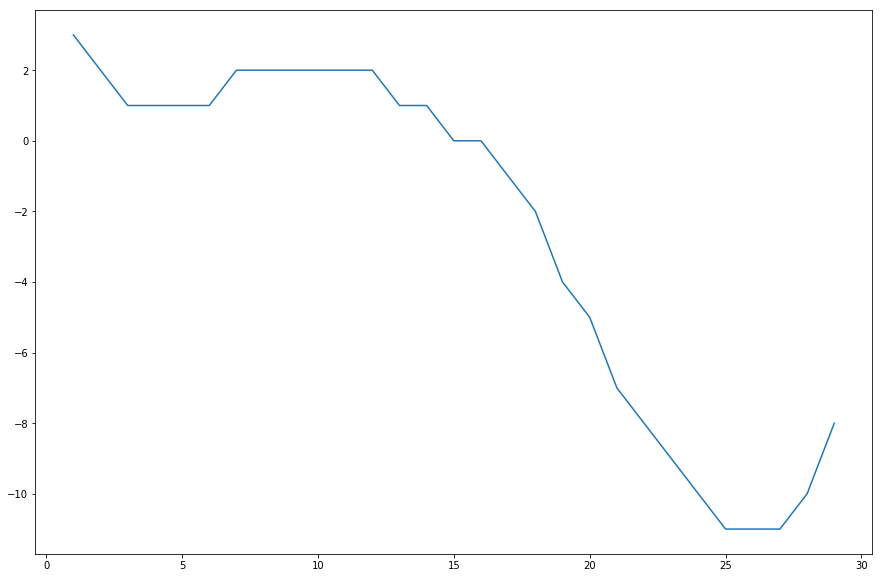

In [21]:
x = np.arange(1, 30)

def h(x):
    return map(int, f(x))
plt.subplots(figsize=(15,10))
plt.plot(x, h(x))

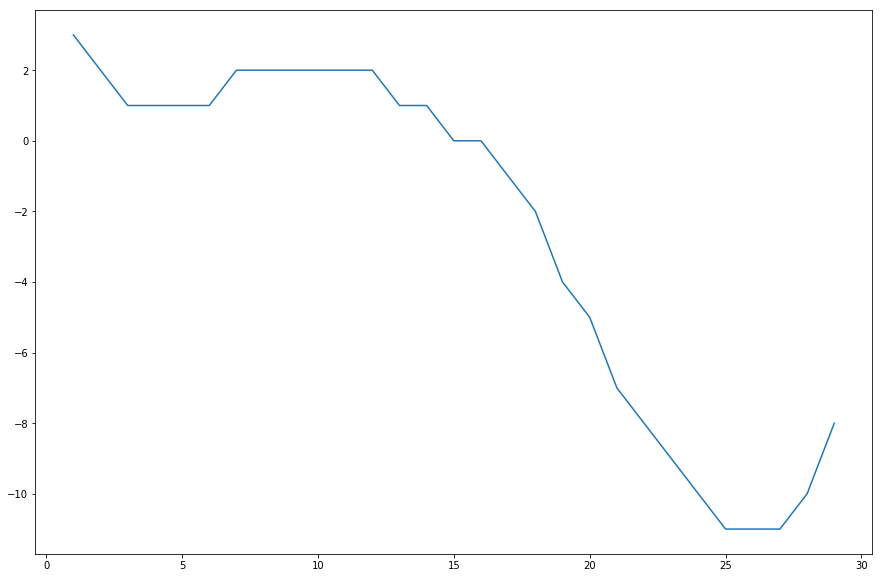

In [20]:
x = np.arange(1, 30)

def k(x):
    return f(x).astype('int')
plt.subplots(figsize=(15,10))
plt.plot(x, k(x))